Osnabrück University - Machine Learning (Summer Term 2016) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack

# Exercise Sheet 05

## Introduction

This week's sheet is supposed to last two weeks and thus should be solved and handed in before the end of **Sunday, May 22, 2016**. If you need help (and Google and other resources were not enough), feel free to contact your groups designated tutor or whomever of us you run into first. Please upload your results to your group's studip folder.

### Zip files

We provided some zip files for these exercises. Once you downloaded them, just put them alongside this sheet and run the following cell to extract them. This allows us to avoid path problems.

In [4]:
import zipfile

def extract_zip(filename):
    """
    Extracts a zip file of name filename.zip to the current working directory.
    """
    filename = "{}.zip".format(filename)
    try:
        with open(filename, 'rb') as f:
            print("Extracting {}...".format(filename))
            z = zipfile.ZipFile(f)
            for name in z.namelist():
                z.extract(name)
            print("Extracted {}.".format(filename))
    except FileNotFoundError:
        print("{} was not found.".format(filename))


for filename in ['eigenfaces', 'leafsnap']:
    extract_zip(filename)

eigenfaces.zip was not found.
leafsnap.zip was not found.


### SciPy, scikit-learn and pillow

From now on you will sometimes need the python package [scikit-learn](https://pypi.python.org/pypi/scikit-learn) (scikit-learn) which depends on [scipy](https://pypi.python.org/pypi/scipy). Another package to handle images is [pillow](https://pypi.python.org/pypi/pillow), which we also recommend to use now (matplotlib already has basic image capabilities, but can only deal with `.png` files). To check if you already have running versions of these packages installed, run the following cell. If something is not found, try to follow the installation steps below. Otherwise just skip the following paragraphs and continue with the assignments.

In [8]:
import importlib
import scipy
assert importlib.util.find_spec('scipy') is not None, 'scipy not found'
assert importlib.util.find_spec('sklearn') is not None, 'scikit-learn not found'
assert importlib.util.find_spec('PIL') is not None, 'pillow not found'

#### Unix

On Unix systems you can easily install the packages with `pip3 install scipy scikit-learn pillow` from any terminal window. If it fails, try to figure out how to install a Fortran compiler for your OS or ask one of your fellow tutors for help.

#### Windows
On Windows it is a little bit more difficult to get a Fortran compiler (and although [MinGW](http://www.mingw.org/) offers one it is still very difficult to get everything to run), so we recommend you to take the [precompiled binaries](http://www.lfd.uci.edu/~gohlke/pythonlibs/) of Christoph Gohlke for [scipy](http://www.lfd.uci.edu/~gohlke/pythonlibs/#scipy). If you previously installed a 32bit version of Python download `scipy-0.17.0-cp35-none-win32.whl`, if you have a 64bit version please resort to `scipy-0.17.0-cp35-none-win_amd64.whl`. If you are unsure which version you run, run the following cell to figure it out:

In [5]:
import platform
print('You are running a {} ({}) version.'.format(*platform.architecture()))

You are running a 64bit () version.


To install the binaries open your command line, navigate to your folder where you downloaded the `*.whl` file to (`cd FOLDER`) and run `pip install scipy-0.17.0-cp35-none-win32.whl` (or `pip install scipy-0.17.0-cp35-none-win_amd64.whl` if you downloaded the 64 bit version).

There might be a problem with your `numpy` version - `scipy` needs the Intel Math Kernel Library which is not easily compiled manually.
If you run into troubles, uninstall `numpy` with `pip uninstall numpy` and download the `*.whl` files from [Gohlke's website](http://www.lfd.uci.edu/~gohlke/pythonlibs/#numpy) again. Proceed as you did with scipy.

For most other packages `pip install [package]`, e.g. `pip install pillow` should be enough - however, the website mentioned above provides most precompiled binaries and if you run into troubles with the normal installations take a look there.

In case of any other problems, get in touch with your tutors!

## Assignment 1: Curse of Dimensionality [4 Points]

For the following exercise, be detailed in your answers and provide some examples. Think about keywords like: random vectors in high dimensional space, manifolds and Bertillonage.

What are the curse of dimensionality and its implication for pattern classification? 

Explain how this phenomenom could be used to one's advantage.

Explain in your own words the concepts of descriptive and intrinsic dimensionality.

## Assignment 2: Implement and Apply PCA [7 Points]

In this assignment you will implement PCA from the ground up and apply it to the `cars` dataset (simplified from the JSE [2004 New Car and Truck Data](http://www.amstat.org/publications/jse/jse_data_archive.htm)). This dataset consists of measurements taken on 97 different cars. The eleven features measured are: Suggested retail price (USD), Price to dealer (USD), Engine size (liters), Number of engine cylinders, Engine horsepower, City gas mileage, Highway gas mileage, Weight (pounds), Wheelbase (inches), Length (inches) and Width (inches). 

We would like to visualize these high dimensional features to get a feeling for how the cars relate to each other so we need to find a subspace of dimension two or three into which we can project the data.

In [6]:
import numpy as np

cars = np.genfromtxt('cars.csv',delimiter=',')

assert cars.shape == (97, 11), "Shape is not (97, 11), was {}".format(cars.shape)

As a first step we need to normalize the data such that they have a zero mean and a unit standard deviation. Use the standard score for this:
$$\frac{X - \mu}{\sigma}$$

In [6]:
import numpy as np
cars_norm = (cars - np.mean(cars,axis=0))/np.std(cars,axis=0)

assert cars_norm.shape == (97, 11), "Shape is not (97, 11), was {}".format(cars.shape)
assert np.abs(np.sum(cars_norm)) < 1e-10, "Absolute sum was {} but should be close to 0".format(np.abs(np.sum(cars_norm)))
assert abs(np.sum(cars_norm ** 2) / cars_norm.size - 1) < 1e-10, "The data is not normalized, sum/N was {} not 1".format(np.sum(cars_norm ** 2) / cars_norm.size)

PCA finds a subspace that maximizes the variance by determining the eigenvectors of the covariance matrix. So we need to calculate the autocovariance matrix and afterwards the eigenvalues. When the data is normalized the autocovariance is calculated as
$$C = X\cdot X^T$$
with $X$ being an $n \times m$ matrix with $n$ features and $m$ samples.
The entry $c_{i,j}$ in $C$ tells you how much feature $i$ correlates with feature $j$. 

In [7]:
import numpy as np

# TODO: Compute the autocovariance matrix and store it into autocovar
autocovar = np.dot(cars_norm.T,cars_norm)

assert autocovar.shape == (11, 11)

eigenval,eigenvec = np.linalg.eig(autocovar)
# TODO: Compute the eigenvalues und eigenvectors and store them into eigenval and eigenvec
#       (Figure out a function to do this for you)


assert eigenval.shape == (11,)
assert eigenvec.shape == (11, 11)

Now you should have a matrix full of eigenvectors. We can now do two things: project the data down onto the two dimensional subspace to visualize it and we can also plot the two first principle component vectors as eleven two dimensional points to get a feeling for how the features are projected into the subspace. Execute the cells below and describe what you see. Is PCA a good method for this problem? Was it justifiable that we only considered the first two principle components? What kinds of cars are in the four quadrants of the first plot?

<IPython.core.display.Javascript object>


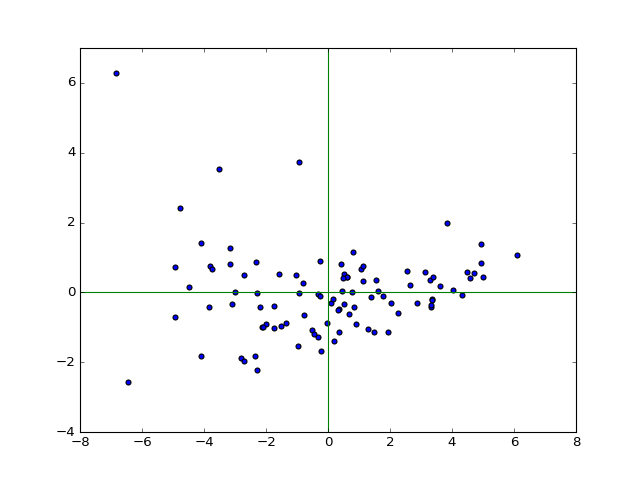

<IPython.core.display.Javascript object>


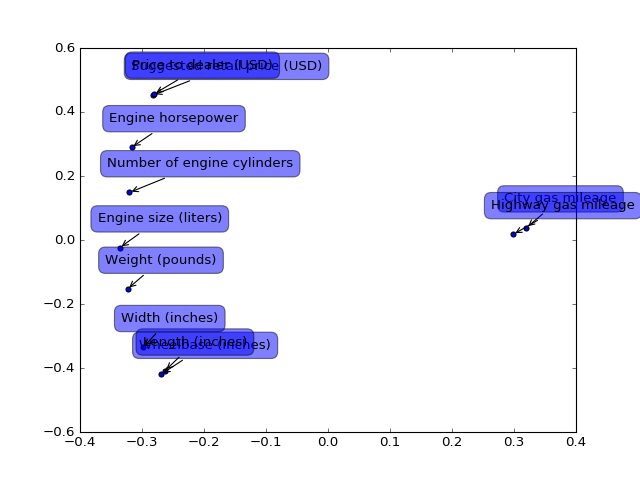

In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt

# Project the data down into the two dimensional subspace
proj = cars_norm @ eigenvec[:,0:2]

# Plot projected data
fig = plt.figure('Data projected onto first two Principal Components')
fig.gca().set_xlim(-8, 8)
fig.gca().set_ylim(-4, 7)
plt.scatter(proj[:,0], proj[:,1])
# Divide plot into quadrants
plt.axhline(0, color='green')
plt.axvline(0, color='green')
# force drawing on 'run all'
fig.canvas.draw()

# Plot eigenvectors
eig_fig = plt.figure('Eigenvector plot')
plt.scatter(eigenvec[:,0], eigenvec[:,1])

# add labels
labels = ['Suggested retail price (USD)', 'Price to dealer (USD)', 
          'Engine size (liters)', 'Number of engine cylinders', 
          'Engine horsepower', 'City gas mileage' , 
          'Highway gas mileage', 'Weight (pounds)', 
          'Wheelbase (inches)', 'Length (inches)', 'Width (inches)']
for label, x, y in zip(labels, eigenvec[:,0], eigenvec[:,1]):
    plt.annotate(
        label, xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'left', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'blue', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
# force drawing on 'run all'
eig_fig.canvas.draw()

## Assignment 3: Eigenfaces [5 Points]

A very famous example of applying PCA to solve classification problems are Eigenfaces. It employs PCA to project training images of faces into the Eigenspace to reduce the dimensionality of those images by a few magnitudes. To classify test images they are projected into the Eigenspace and the (euclidean) distance between the sample and each reduced training image is calculated - the closest training image wins.

To avoid problems with your own implementation of PCA in assignment 2 you will now rely on the `scipy` package which already provides an implementation of PCA.

First you will implement the Eigenfaces algorithm and apply it to a subset of the [Extended Yale Face Database B](http://www.cad.zju.edu.cn/home/dengcai/Data/FaceData.html) (the subset of files is stored in `eigenfaces.zip`). Then you will apply the same procedure to another data set, [leafsnap](http://leafsnap.com/dataset/) (`leafsnap.zip`). 

The face dataset is provided in two sets (`eigenfaces/train` and `eigenfaces/test`) which each yield four images per each of five different people in the [pgm](http://netpbm.sourceforge.net/doc/pgm.html) format (which is supported by `matplotlib` via `pillow`). 
The leafsnap dataset is provided in two sets as well (`leafsnap/train` and `leafsnap/test`) which each contain two images of leaves from 184 different tree species. They were automatically cropped to square images, resized to a resolution of 200x200 pixels and converted to the [png](https://en.wikipedia.org/wiki/Portable_Network_Graphics) format.


### a) Understanding PCA for Eigenfaces

To apply PCA on the samples you first need to understand what we are trying to do.

Usually a grayscale image is seen as a set of pixels each being a three dimensional datapoint consisting of features X coordinate, Y coordinate and gray value. This is very useful for many types of segmentation or clustering problems, where our image is a space with three dimensions (X, Y, Color).

For the Eigenface method we have to consider images in a different way!
Here each image is one data point in the hyper space containing all possible images with the same resolution. So each image is a data point consisting of pixel many dimensions or features, each having a value of the color at that pixel.

To make this a little bit more clear, consider the 2x2 binary images (see the plot below). Each image is one out of 16 possible data points in the space of all possible 2x2 binary images. The space has four dimensions with two possible values in each, so there are $2^4=16$ possible images. They can be described as feature vectors: 
$$\text{image} = \left(\matrix{\text{pixel color top left}\\ \text{pixel color top right}\\ \text{pixel color bottom left}\\ \text{pixel color bottom right}}\right)$$.

<IPython.core.display.Javascript object>


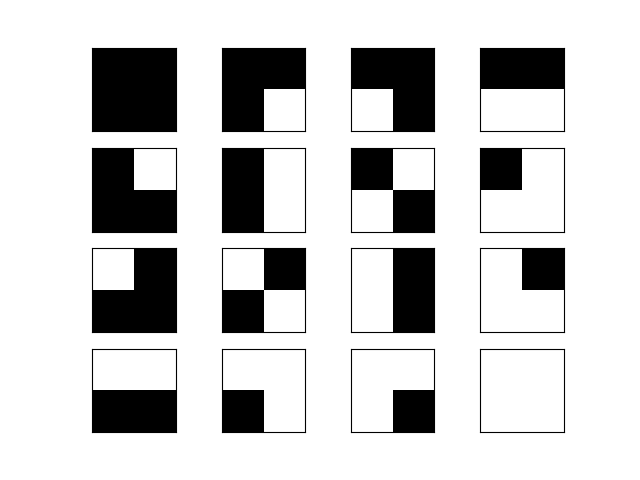

In [9]:
%matplotlib notebook
import itertools
import numpy as np
import matplotlib.pyplot as plt

# Creates all possible combinations of 4 0s and 1s.
images = list(itertools.product([0,1], repeat=4))

bin_images = plt.figure('Binary 2x2 Images')
for i, img in enumerate(images):
    ax = plt.subplot(4, 4, i + 1)
    # Remove axis ticks for a better image experience.
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    # Pretend the artificial arrays are beautiful pictures.
    plt.imshow(np.array([img] * 3).T.reshape(2,2,3), interpolation='nearest')
# force drawing on 'run all'
bin_images.canvas.draw()

This is a relatively small space. What if there were 256 different gray values? The number of possible images increased to $256^4=4,294,967,296$.

Our eigenface images are 192x168 pixels each and allow 256 different gray values. This means there are $256^{192 \cdot 168}=256^{32256}$ possible images (which is a lot as you can see below - a number with $77681$ digits).

In [10]:
import math
a = 256 ** (192 * 168)
print("Digits: {}".format(math.ceil(math.log(a) / math.log(10))))
print(a) # This line takes a second or two to execute, be warned.

Digits: 77681
15428407427178765160939279655641107885032958163463359040484978373678907659795317098525214185472047863888668541868151121466917823723982327300248087231138909399980278075870491426342642492430514498021311695703691428488217012623243856198534651133282872440249711025533691309473935383984221767609433715052890270713479515040421628034619246214463382388980580183114961971416367326913803483972611630459999141359245627678329520254049861651989361529246331278931624865072211573536005754081425452326487399887812658385589806453194385941209543400336777128844886218254097332199967779708263104689307473945736469414529569836977360093373752838399401645065970536303802033927384666354396921927400661571319575667956915986796740985531380586581108239916576304938902930681000114487594229079732488158746559263561823553145179910209279345939793049598344569352224726948524848383955442594750729291859651006669878895349730569828180784355438780444936667907877715285439802595664416531134187349630643609309900368847275890

How many principal components are there at most when you apply the PCA with the 20 training face images provided?
How many principal components were there for the 16 binary images if we made a PCA on all of them?

### b) Reading the data

Implement the methods `get_sample_database` and `read_sample` in the following cells to easily read in all images we are going to work with. Use the function `get_class_name_from_file` to generate class names to store as `name`.

In [11]:
import os

def get_class_name_from_file(file):
    """
    Returns a class name from the file path provided.
    Takes only the filename (discards the rest of the path), 
    splits it on underscores and discards the last parts (assumed 
    to be numbers and file endings). 
    Then the parts are joined again with spaces and the string is
    capitalized.
    For example
    /Users/esinclair/work/dino_01_1.jpg
    will result in
    Dino 01
    
    Args:
        file    the filename to operate on
    Returns:
        A class name derived from the filename.
    """
    return ' '.join(file.split(os.path.sep)[-1][:-4].split('_')[0:2]).capitalize()

In [12]:
import os
import matplotlib.pyplot as plt

def read_sample(imagepath):
    """
    Reads an image file using plt.imread.
    If the image has multiple color channels, only the first 
    channel is returned.
    
    Args:
        imagepath   the path to the image file
    Returns:
        A two dimensional np array with the color information.
    """
    # TODO
    img = plt.imread(imagepath)
    return plt.imread(imagepath)


face = read_sample(os.path.join('eigenfaces', 'test', 'person_01_1.pgm'))
leaf = read_sample(os.path.join('leafsnap', 'test', 'acer_palmatum_1.png'))

assert face.shape == (192, 168), 'face.shape does not fit! Was: {}'.format(face.shape)
assert leaf.shape == (200, 200), 'leaf.shape does not fit! Was: {}'.format(leaf.shape)

del face, leaf

ValueError: Only know how to handle extensions: ['png']; with Pillow installed matplotlib can handle more images

In [ ]:
import os
import glob
import pprint
import numpy as np

def get_sample_database(path, limit=-1):
    """
    Returns a list of dictionaries {'name': ..., 'data': ...}, where
    names correspond the classification class (e.g. person01) and data corresponds
    to the image data from that file.
    Since there can be multiple training samples for the same classification, the
    entries in 'name' don't need to be unique!
    
    Args:
        path    the path to the images (e.g. the eigenfaces/train directory)
        limit   the number of images to be read, values < 0 (default is -1) 
                allow reading of all images
    Returns:
        A list of dictionaries containing the image names and data, like:
        [{'name': 'Person 01', 'data': np.array(...)}, {'name': 'Person 01', 'data': np.array(...)}, ...]
    """
    # Get all sample file paths.
    files = glob.glob(os.path.join(path, '*'), recursive=True)

    # Reduce the number of samples to the limit.
    if limit >= 0:
        files = files[0:min(limit, len(files))]

    # TODO: Create the database list.
    return None


faces_test = get_sample_database(os.path.join('eigenfaces', 'test'), 2)
leafsnap_test = get_sample_database(os.path.join('leafsnap', 'train'), 1)

print('Faces:')
pprint.pprint(faces_test)
print('Leaves:')
pprint.pprint(leafsnap_test)

assert len(faces_test) == 2, 'faces_test has length {}'.format(len(faces_test))
assert len(leafsnap_test) == 1, 'leafsnap_test has length {}'.format(len(leafsnap_test))

assert faces_test[0]['name'] == 'Person 01', "faces_test[0]['name'] was not Person 01 but {}".format(face_test[0]['name'])

assert isinstance(leafsnap_test[0]['data'], np.ndarray), "leafsnap_test[0]['data'] is no numpy array"

del faces_test, leafsnap_test

### c) Apply PCA

To apply the PCA for the Eigenfaces you will implement three more functions. `compose_matrix` and `plot_results` which will be used in addition to the PCA from `sklearn`. Additionally there will be a function which evaluates the success, `report_success`.

First implement `compose_matrix`, which creates a raw data matrix out of the databases we created before.

In [ ]:
import os
import numpy as np

def compose_matrix(database):
    """
    This method creates a raw data matrix from the database provided.
    If there are N database entries with an np.array of MxP values as 'data',
    then the resulting matrix is of size Nx(M*P).
    Thus row 0 contains the pixel values of the 0th element of the database,
    row 1 the values of the 1st, etc.
    
    Args:
        database   a database as it is returned by get_sample_database(path, limit)
    Returns:
        An Nx(M*P) matrix.
    """
    # TODO
    return None


# simple example: artificial 2x3 all white and all black images
simple_database = [{'name': 'allwhite', 'data': np.array([[1, 1, 1], [1, 1, 1]])}, 
                   {'name': 'allblack', 'data': np.array([[0, 0, 0], [0, 0, 0]])}]
matrix = compose_matrix(simple_database)

assert matrix.shape == (2, 6), "The shape should be (2, 6), was: {}".format(matrix.shape)
assert all(matrix[0,:]), "The first row should be only 1s, was: {}".format(matrix[0,:])
assert not any(matrix[1,:]), "The second row should be only 0s, was: {}".format(matrix[1,:])

# complex example: actual images
complex_database = get_sample_database(os.path.join('eigenfaces', 'train'), 4)
matrix = compose_matrix(complex_database)

assert matrix.shape == (4, 32256), "The shape should be (4, 32256), was: {}".format(matrix.shape)

del simple_database, complex_database, matrix

Next implement `report_success`, a function which returns the success rate and counts for hits and misses. To check if a sample was correctly identified, check the names of the train and test samples for equality.

In [ ]:
def report_success(train_database, test_database, best_matches):
    """
    This function returns the number of hits and misses.
    Takes a train database and a test database as returned by 
    get_sample_database(path, limit) and a list of best_matches.
    
    The test database entries are mapped to the train database entries via 
    the best matches array.
    That means for each entry in the test database there has to be a single
    integer value in the best matches list which corresponds to the index of
    the match for that test sample in the train database.
    
    Args:
        train_database  the training database
        test_database   the test database
        best_matches    a list of indices (len(best_matches) == len(test_database))
                        to map the test samples to their best matching training 
                        samples
    Returns:
        Hits, Misses, Ratio
            counts for hits and misses, respectively and the ratio hits/total
    """
    # TODO
    hits, misses, ratio = None, None, None
    return hits, misses, ratio


train_data = [{'name': 'hit', 'data': None}, 
              {'name': 'hit', 'data': None},
              {'name': 'hit', 'data': None},
              {'name': 'success', 'data': None}]
test_data  = [{'name': 'hit', 'data': None}, 
              {'name': 'miss', 'data': None},
              {'name': 'hit', 'data': None},
              {'name': 'success', 'data': None},
              {'name': 'failure', 'data': None}]
best_matches = [0, 1, 1, 3, 3]

hits, misses, ratio = report_success(train_data, test_data, best_matches)

assert hits == 3, "Result for hits {} is incorrect, should be 3!".format(hits)
assert misses == 2, "Result for misses {} is incorrect, should be 2!".format(misses)
assert abs(ratio - 0.6) < 1e-10, "Result for ratio {} is incorrect, should be 0.6!".format(ratio)

Now implement `plot_results`. It should be able to plot at least the first 10 results in one figure (the rest can be skipped), resulting in a subplot with 5 rows and 4 columns, where columns 1 and 3 contain test images and columns 2 and 4 the corresponding result images.

*Hint:* Matplotlib's `imshow` will scale (m,n,1) images according to a colormap, thus the results might look a bit different than when you look at the images in your other image programs. To get similar results you can replicate the matrix to shape (m,n,3) - this involves for example `np.tile` and `np.newaxis`, as it can be found on [stackoverflow](http://stackoverflow.com/q/1721802/3004221). (Note that this is not necessary for the exercise, it's enough if you get some images!)

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

def plot_results(train_database, test_database, best_matches, max_results=float('inf')):
    """
    Takes a train database and a test database as returned by 
    get_sample_database(path, limit) and a list of best_matches.
    
    Plots at most max_results many results, where the test database entries
    are mapped to the train database entries via the best matches array.
    That means for each entry in the test database there has to be a single
    integer value in the best matches list which corresponds to the index of
    the match for that test sample in the train database.
    
    The results are plotted in subplots of size 5x4, where the 1st and 3rd 
    column contain the test images and the 2nd and 4th column the corresponding
    train images.
    
    Args:
        train_database  the training database
        test_database   the test database
        best_matches    a list of indices (len(best_matches) == len(test_database))
                        to map the test samples to their best matching training 
                        samples
        max_results     the number of results to plot
    """
    # TODO
    pass

Finally implement the PCA procedure. Follow the `TODO` comments in the code below (the `TODO (bonus exercise)` is optional but provides some interesting insights towards the understanding of principal components in this method).
Figure out how to control the number of components used by the PCA. Find the lowest possible values still able to achieve 100% (90%, 80%) correct classifications.

In [ ]:
%matplotlib notebook
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.decomposition.pca import PCA

BASE = 'eigenfaces'
# BASE = 'leafsnap'
TRAIN = os.path.join(BASE, 'train')
TEST = os.path.join(BASE, 'test')

# Read in the samples for training and test.
train_database = get_sample_database(TRAIN)
test_database = get_sample_database(TEST)

# TODO: Create data matrices for training and test.


# TODO: Create an instance of PCA and fit the training data to it.


# TODO (bonus exercise): Retrieve the principal components from the pca
#       and plot them as images. You can limit the number of components
#       to plot.


# TODO: transform the training data into the new PCA base
#       and do the same for the test data.


# TODO: Find the best match for each test sample in the training
#       samples. (Consider using cdist).


# TODO: Report the success and plot the results 
#       (try only 20 results to not get too many plots).


### d) Eigenleaves

In the code above uncomment `# BASE = 'leafsnap'` and run the code again. The calculations will take a little longer as there are more samples involved (remember to only plot a few results). Again try out different numbers of components used by the PCA. Explain the differences of the results between the two datasets.

## Assignment 4: PCA [4 Points]

In this exercise we investigate the statement from the lecture that PCA finds the subspace that captures most of the data variance. To be more precise, we show that the orthonormal projection onto an $m$-dimensional subspace that maximizes the variance of the projected data is defined by the principal components, i.e. by the $m$ eigenvectors of the autocorrelation matrix $C$ corresponding to the $m$ largest eigenvalues. We proceed in two steps:

### a)

First consider a one dimensional subspace: determine a (unit) vector $\vec{p}$, such that the variance of the data, when projected onto the subspace determined by that vector, is maximal.

The autocorrelation matrix $C$ allows to compute the variance of the projected data as $\vec{p}^{T}C\vec{p}$. We want to maximize this expression. To avoid $\|\vec{p}\|\to\infty$ we will only consider unit vectors, i.e. we constrain $\vec{p}$ to be normalized: $\vec{p}^T\vec{p}=1$. Maximize the expression with this constraint (which can be done using a Lagrangian multiplier). Conclude that a suitable $\vec{p}$ has to be an eigenvector of $C$ and describe which of the eigenvectors is optimal.

### b)

Now proof the statement for the general case of an $m$-dimensional projection space.

Use an inductive argument: assume the statement has been shown for the $(m-1)$-dimensional projection space, spanned by the $m-1$ (orthonormal) eigenvectors $\vec{p}_1,\ldots,\vec{p}_{m-1}$ corresponding to the $(m-1)$ largest eigenvalues $\lambda_1,\ldots,\lambda_{m-1}$. Now find a (unit) vector $\vec{p}_m$, orthogonal to the existing vectors $\vec{p}_1,\ldots,\vec{p}_{m-1}$, that maximizes the projected variance $\vec{p}_m^TC\vec{p}_m$. Proceed similar to case (a), but with additional Lagrangian multipliers to enforce the orthogonality constraint. Show that the new vector $\vec{p}_m$ is an eigenvector of $C$. Finally show that the variance is maximized for the eigenvector corresponding to the $m$-th largest eigenvalue $\lambda_m$.